# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Sample data (replace this with your own dataset)
data = {
    'Headcount': [100, 95, 92, 88, 85],
    'Terms': [5, 3, 4, 4, 3],
    'TenureYears': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

# Prepare the features (X) and target variable (y)
X = df[['Headcount', 'Terms', 'TenureYears']]
y = df['TurnoverRate']  # Assuming you have a 'TurnoverRate' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gaussian process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create a Gaussian process regression model
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred, sigma = model.predict(X_test, return_std=True)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualize the results (optional)
plt.scatter(X_test['TenureYears'], y_test, color='black', label='Actual')
plt.scatter(X_test['TenureYears'], y_pred, color='blue', label='Predicted')
plt.xlabel('Tenure Years')
plt.ylabel('Turnover Rate')
plt.legend()
plt.show()

KeyError: 'TurnoverRate'

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
df_sp = df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values(ascending = True)
df_sp

restaurant_name
Haru Gramercy Park        20.0
67 Burger                 20.0
Frank Restaurant          20.0
DespaÌ±a                  20.5
Sarabeth's West           21.0
                          ... 
Taro Sushi                35.0
Cipriani Le Specialita    35.0
Kambi Ramen House         35.0
Klong                     35.0
Sushi Choshi              35.0
Name: food_preparation_time, Length: 178, dtype: float64

In [3]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
All columns have 1898 observations 
rating is read as an 'object' data type, but it should have the data type as String.
restaurant_name, cuisine_type, day of the week should be categorical variables.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
# Checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
All variables have no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [9]:
Mean_Food_Preparation_Time = df['food_preparation_time'].mean()
print('Average time required for the food to be prepared once an order is placed ',round(Mean_Food_Preparation_Time,2),'minutes')

Average time required for the food to be prepared once an order is placed  27.37 minutes


In [10]:
Min_Food_Preparation_Time = df['food_preparation_time'].min()
print('Minimum time required for the food to be prepared once an order is placed ',round(Min_Food_Preparation_Time,2),'minutes')

Minimum time required for the food to be prepared once an order is placed  20 minutes


In [11]:
Max_Food_Preparation_Time = df['food_preparation_time'].max()
print('Maximum time required for the food to be prepared once an order is placed ',round(Max_Food_Preparation_Time,2),'minutes')

Maximum time required for the food to be prepared once an order is placed  35 minutes


#### Observations:
It takes minimum 20 min for food to be prepared once an order is placed.
It takes an average of 27 min for food to be prepared once an order is placed.
It takes maximum (no greater than) of 35 min for food to be prepared once an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
df['rating'].describe(exclude = 'number').T

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [13]:
# Making a list of all categorical variables 
cat_col = ['rating']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
--------------------------------------------------


#### Observations:
There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Univariate Analysis is performed on a uni (single) variable or column 

In [14]:
# Number of unique orders
df['order_id'].nunique()  

1898

#### There are 1898 unique orders

In [15]:
# Number of unique customer ID
df['customer_id'].nunique()  

1200

#### There are 1200 customers orders

In [16]:
# Number of unique Restaurant Names
df['restaurant_name'].nunique()

178

#### There are 178 unique resturant names

In [17]:
# Number of unique Cusines Types
df['cuisine_type'].nunique()

14

#### There are 14 unique cuisines

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

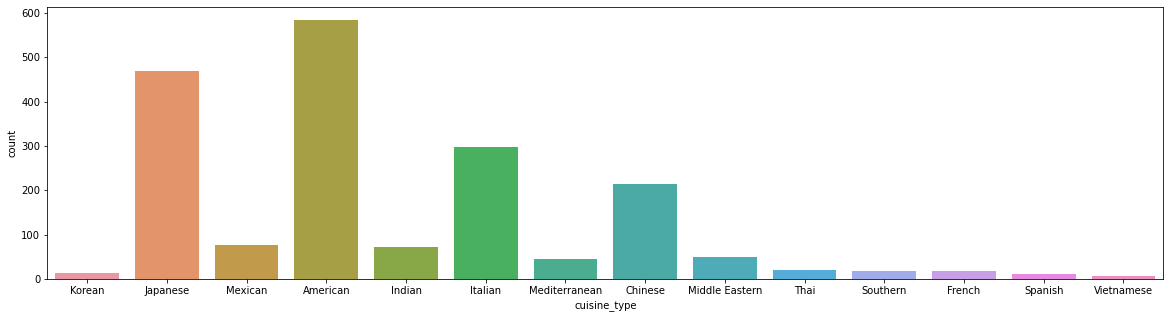

In [18]:
plt.figure(figsize = (20,5))
sns.countplot(data = df, x = 'cuisine_type') 

#### American, Japanase and Italian are the top 3 cusine types

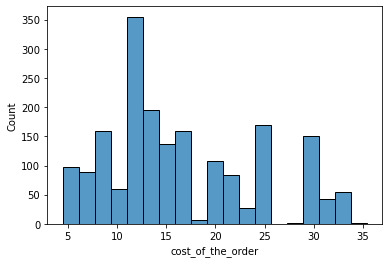

In [19]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()

#### 12.5 dollars appears to be the median of the cost of order. Most orders are placed for less than 20 dollars.

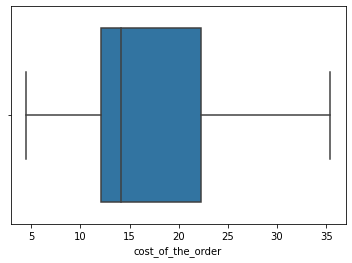

In [20]:
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Cost of orders does not have outliers in the data with a interquartile range between 12.5 to 22.5 dollars

In [21]:
# # Check the unique values
df['day_of_the_week'].nunique()

2

#### There are 2 unique day of the week

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

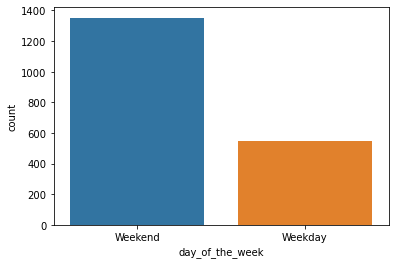

In [22]:
sns.countplot(data = df, x = 'day_of_the_week') 

#### Customers purchase approx over twice over the Weekend vs Weekday

<AxesSubplot:xlabel='rating', ylabel='count'>

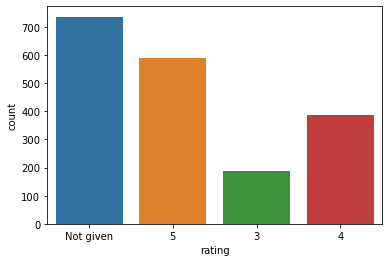

In [23]:
sns.countplot(data = df, x = 'rating')

#### There are over 700 orders without Rating, while around 600 with the 5 star rating and approx 400 with 4 star rating

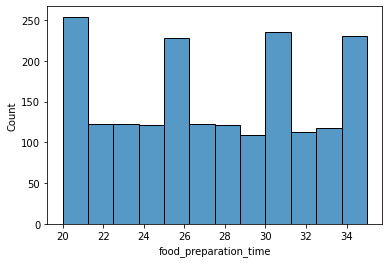

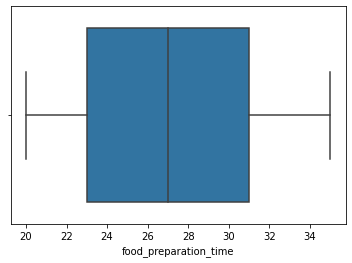

In [24]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

#### The range of food preparation time is in between 21 to 31 minutes

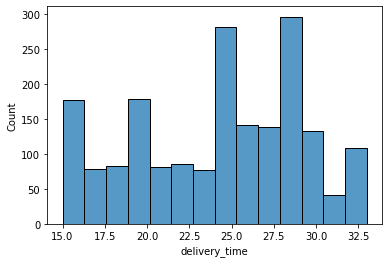

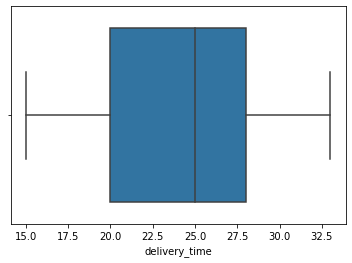

In [25]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time')  
plt.show()

#### The range of delivery time is in between 20 to 28 minutes with the median as 28 dollars approx. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
# Write the code here
# Making a list of restaurant names 
cat_col = ['restaurant_name']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Samurai Mama                   1
Klong                          1
Dos Caminos Soho               1
Woorijip                       1
Balade                         1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------


#### Observations: 
Following are the top 5 restaurants in terms of number of orders received :-
Shake Shack 219, The Meatball Shop 132,Blue Ribbon Sushi 119,Blue Ribbon Fried Chicken 96 & Parm 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
# Write the code here
df.describe(exclude = 'number').T
Weekend_Df= df[df['day_of_the_week']=='Weekend']
Most_Popular_Cuisine_type_Weekend = Weekend_Df.groupby('cuisine_type').count().head(1)
print(Most_Popular_Cuisine_type_Weekend['order_id'])

cuisine_type
American    415
Name: order_id, dtype: int64


#### Observations:
American is the most popular cuisine type

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
# Write the code here
Order_More_Than_20_dollar = df[df['cost_of_the_order']>20]
##print(Order_More_Than_20_dollar)

# Formula for calculating % of order costing more than 20 dollars
## % of orders cost more than 20 dollar = No of unique records for orders cost more than 20 dollars/No of unique records for total orders)*100

Percentage_Order_More_Than_20_dollars = (Order_More_Than_20_dollar.shape[0]/df.shape[0])*100
print('The percentage of orders more than 20 dollars', round(Percentage_Order_More_Than_20_dollars,2),'%')

The percentage of orders more than 20 dollars 29.24 %


#### Observations:
The percentage of orders more than 20 dollars 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print ('The mean order delivery time is', round (mean_delivery_time,2),'min')

The mean order delivery time is 24.16 min


#### Observations:
24.16 min is the mean order delivery time

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
# Write the code here
Grouping_by_Customer_Id = Weekend_Df.groupby('customer_id').count()
Top_three_customer_id_df = Grouping_by_Customer_Id.sort_values('order_id', ascending=False).head(3)
print ('The Ids of top 3 most frequent customers and number of orders they placed are',
       Top_three_customer_id_df['order_id'])

The Ids of top 3 most frequent customers and number of orders they placed are customer_id
83287     8
47440     7
259341    6
Name: order_id, dtype: int64


#### Observations:
The Ids of top 3 most frequent customers and number of orders they placed are
83287 (8),
47440 (7),
259341(6)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


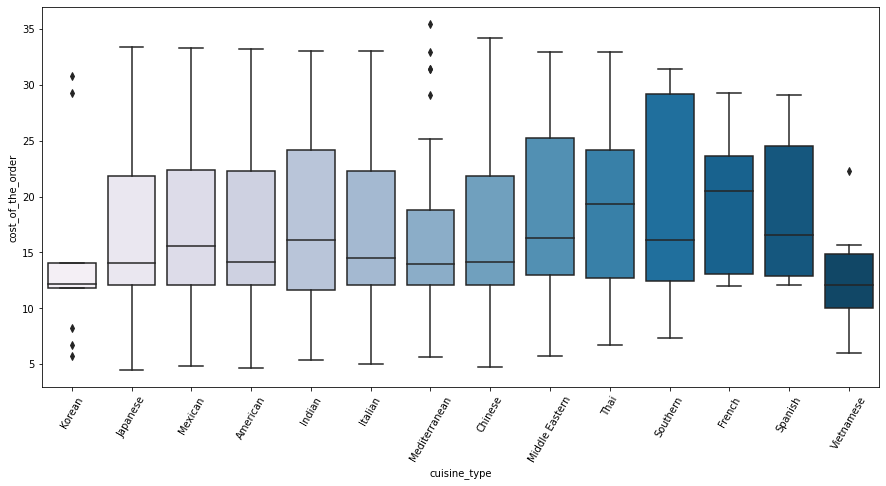

In [31]:
# Cusisine vs Cost of order 
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Korean, Mediterranean and Vietnamese cuisine types has outlier. Southern cusine type has the highest cost of order while Vietnamese has the lowest cost of order. 

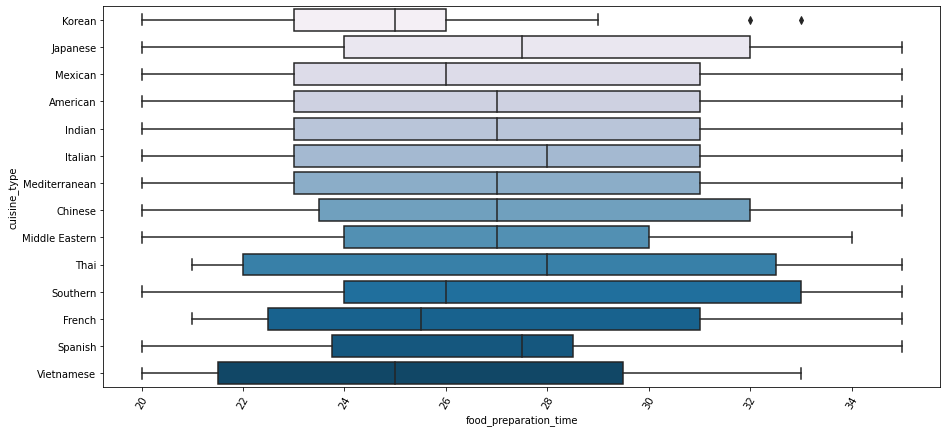

In [32]:
# Food preparation time vs Cusisine 
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = df, palette = 'PuBu')  
plt.xticks(rotation = 60)
plt.show()

#### Southern cuisine has the highest food preparation time while and Vietnamese has the lowest food preparation time.

In [33]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Shake Shack 3579.53, The Meatball Shop 2145.21, Blue Ribbon Sushi 1903.95, Blue Ribbon Fried Chicken 1662.29 & Parm are the top 5 restaurants with highest corder of the order.                             1112.76

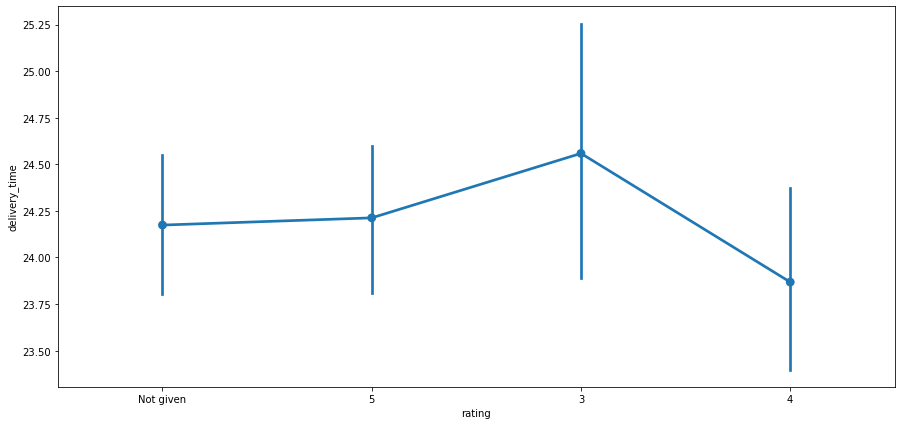

In [45]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Reduce the delivery time for a higher rating. Rating 3 has the widest range of delivery time. 

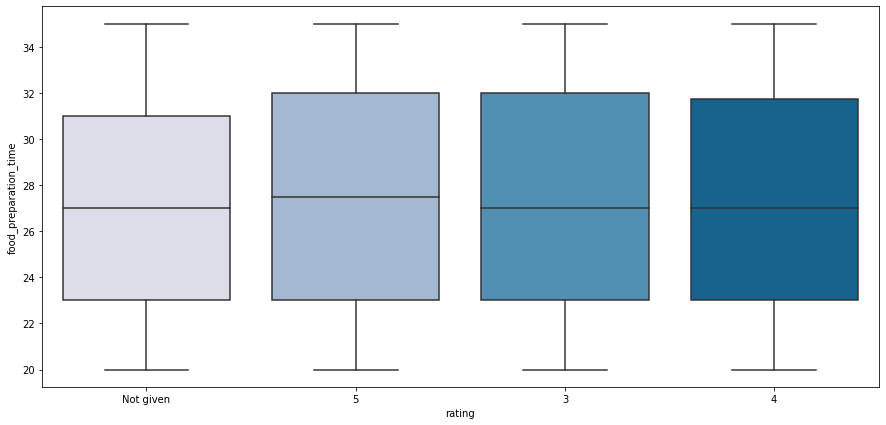

In [46]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'PuBu') 
plt.show()

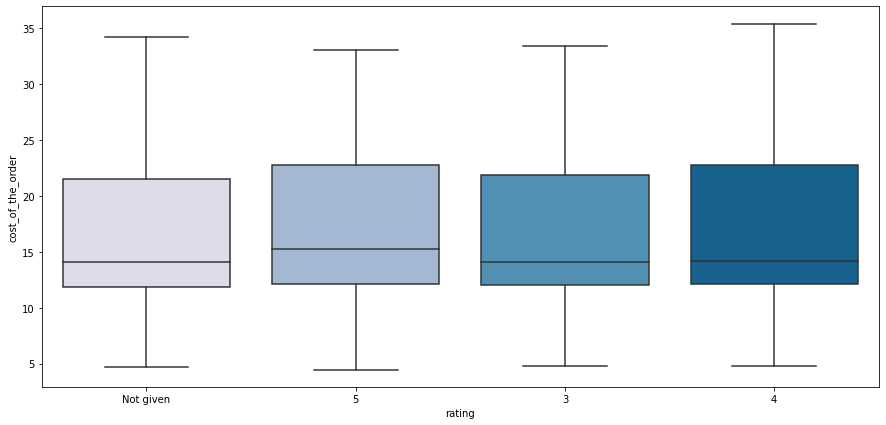

In [36]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, palette = 'PuBu') 
plt.show()

#### Reduce the delivery time for a higher rating. Rating 3 has the widest range of delivery time. 

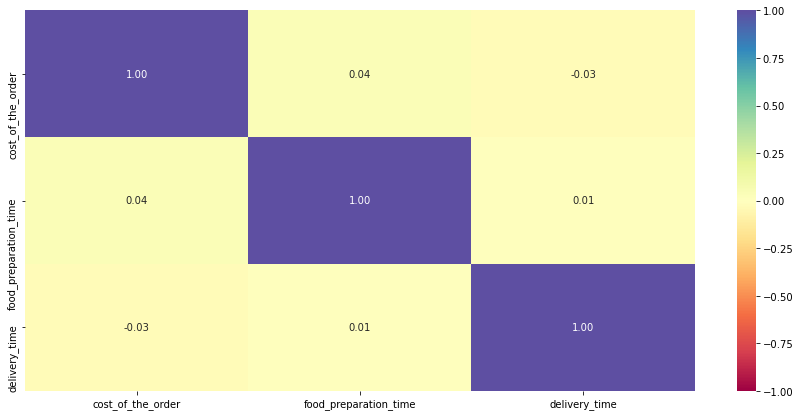

In [37]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [60]:
# Write the code here
# Filter out the non -rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
#print(df_rated)

# Convert rating column data type to integer from object
df_rated['rating'] = df_rated['rating'].astype('int')
#print(df_rated['rating'].dtypes) 


df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [70]:
# The restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
#rest_names

# Filtering the the data of restaurants that have rating count more than 50
df_mean = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
#print(df_mean)

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df2= df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 
df2

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The mean rating for each restaurants with rating count more than 50 is as above. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [41]:
# Write the code here
# Function to determine the revenue
def discount(d):
    if d > 20:
        return d*0.25
    elif d > 5:
        return d*0.15
    else:
        return d*0

df['Revenue'] = df['cost_of_the_order'].apply(discount) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [42]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue is around 6166.3 $

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [43]:
# Write the code here
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Order_More_Than_60_minutes
Order_More_Than_60_minutes = df[df['total_time']>60]

Percentage_Order_More_Than_60_minutes = (Order_More_Than_60_minutes.shape[0]/df.shape[0])*100

print('The percentage of orders more than 60 minutes is', round(Percentage_Order_More_Than_60_minutes,2),'%')


The percentage of orders more than 60 minutes is 10.54 %


#### Observations:
The percentage of orders more than 60 minutes is 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# Get the mean delivery time on weekdays and print it
Delivery_time_on_weekdays = df[df['day_of_the_week'] == 'Weekday']
Delivery_time_on_weekdays
Mean_Delivery_time_on_weekdays = Delivery_time_on_weekdays['delivery_time'].mean()
Rounding_Mean_Delivery_time_on_weekdays =round(Mean_Delivery_time_on_weekdays,2)
Rounding_Mean_Delivery_time_on_weekdays

print('The mean delivery time on weekdays is around', Rounding_Mean_Delivery_time_on_weekdays,'minutes')

# Get the mean delivery time on weekends and print it
Delivery_time_on_weekend = df[df['day_of_the_week'] == 'Weekend']
Delivery_time_on_weekend
Mean_Delivery_time_on_weekend = Delivery_time_on_weekend['delivery_time'].mean()
Rounding_Mean_Delivery_time_on_weekend =round(Mean_Delivery_time_on_weekend,2)
Rounding_Mean_Delivery_time_on_weekend
print('The mean delivery time on weekend is around', Rounding_Mean_Delivery_time_on_weekend,'minutes')

The mean delivery time on weekdays is around 28.34 minutes
The mean delivery time on weekend is around 22.47 minutes


#### Observations:
The mean delivery time on weekdays is around 28.34 minutes
The mean delivery time on weekend is around 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  We analyzed a dataset of 1898 unique orders from the food aggregator company that had stored the data of the different orders made by the registered customers in their online portal.  .


We have been able to conclude that: 

1. Customers purchase approx over twice over the Weekend vs Weekday
2. American food is the most favourite cusine type. 
3. The top 5 restaurants in terms of number of orders received are Shake Shack 219, The Meatball Shop 132,Blue Ribbon Sushi 119,Blue Ribbon Fried Chicken 96 & Parm 68
4. The mean order delivery time is 24.16 min
5. It takes minimum 20 min for food to be prepared once an order is placed. It takes an average of 27 min for food to be prepared once an order is placed. It takes maximum (no greater than) of 35 min for food to be prepared once an order is placed.
6. It is encouraging to see that The top 3 most frequent customers and number of orders they placed are 83287(8),47440(7) and 259341 (6)
7. There are 796 orders without rating. I'd recommend restaurants to encourage all customers to share their feedback and rating. 
8. The percentage of orders more than 60 minutes is 10.54 %
7. We need to further investigate the low number of orders for Weekday.

### Recommendations:

*  1. The mean delivery time on weekdays is around 28.34 minutes The mean delivery time on weekend is around 22.47 minutes.The restaurants need to work on bringing the mean delivery time over weekdays close to the weekends to increase orders over non-working days. 
2. There has been an increase in orders over the weekends, and we need to keep up the momentum.
3. The percentage of orders more than 20 dollars 29.24 %. This % might need to be drop down to increase number of orders. 
4. In addition to providing 20% discount vouchers to the top 3 most frequent customers, additional promotional offers should be facilitated.  
4. It takes minimum 20 min for food to be prepared once an order is placed. It takes an average of 27 min for food to be prepared once an order is placed. It takes maximum (no greater than) of 35 min for food to be prepared once an order is placed.
5. Thereby, Food preparation time : 20 min <=27 min <=35 min. I'd recommend to get this maximumn time to reach as close as 20 min. 
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. There are 796 orders without rating. I'd recommend restaurants to encourage all customers to share their feedback and rating. 
7. The percentage of orders more than 60 minutes is 10.54 %. I'd recommend restaurants to bring this number down to 0%.
7. Procure more data on orders, customers feedback etc and build a model that can predict optimal cost, discount, total revenue.

#### Further Analysis
---------------------------------
1. Dig deeper to explore the variation of orders, during working days and non-working days. 
2. Garner data with specific feedback data along with rating to perform text analysis. 

---